In [3]:
!python augmentation_colab.py
!python config.py
!python np.py


In [6]:
from pathlib import Path
import augmentation_colab
from torch.utils.data import DataLoader, Dataset
from torchvision import transforms
from torchvision.transforms import Compose
from PIL import Image
from np import *  # import numpy as np
import cv2
import torch
import random

# __getitem__でiterを明示せずにデータ収集できるか
class image_feature(Dataset):
    IMG_EXTENSIONS = [".jpg", ".jpeg", ".png", ".bmp"]

    def __init__(self, img_dir,cuda_enabled,augment,img_w,img_h):
        # 画像ファイルのパス一覧を取得する。
        img_dir = Path(img_dir)
        # img_dirから1つ下のディレクトリをワイルドカードで読みだすので、イヌ、ネコのフォルダー名0/1を別々に処理する必要がない
        dir_list = img_dir.glob('*/*')
        self.img_paths = [ p for p in dir_list if p.suffix in image_feature.IMG_EXTENSIONS]

        path = self.img_paths
        self.labels =[]
        self.images =[]
        #composeは以下参照　画像処理を全てまとめて連続処理するためのパイプライン。この中でaugmentationもできるらしい
        #https://pytorch.org/vision/main/generated/torchvision.transforms.v2.Compose.html
        #https://cgpipeliner.info/2022/04/03/torchvision-transform-for-pilimage/
        #https://pystyle.info/pytorch-list-of-transforms/#outline__4_1

        # interpolationはresizeにともなう画像ノイズを補完するもの
        # https://qiita.com/sinpcw/items/fd432374ba31b44af864

        self.transform=Compose([transforms.Resize((img_h,img_w)), transforms.ToTensor(), transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),])
        #self.transform=Compose([transforms.ToTensor(), transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),])

        def build_dataset(label, img):
            img=Image.fromarray(img)
            img = self.transform(img)

            self.labels.append(label)
            self.images.append(img)



        for i in range(len(path)):
            img = Image.open(path[i])
            img = np.asarray(img)
            #img=cv2.imread(str(path[i]))
            #img = cv2.resize(img, dsize=(img_w,img_h))
            label = int(str(path[i]).split("/")[-2])# ディレクトリをパス\をセパレータにしてリスト型にしたうえで、後ろから2つ目、つまりイヌ、ネコ画像の親フォルダ0,1の文字列を読んでいる
            build_dataset(label,img)
            if augment ==0:
                continue
            aug = augmentation_colab.aug(img)
            img_h_flip = aug.horizontal_flip()
            build_dataset(label,img_h_flip)
            for j in range(1):
                shear_range =0.2
                img_affine = aug.affine(shear_range)
                build_dataset(label,img_affine)
                shift_ratio = 0.3
                img_shift = aug.horizontal_shift(shift_ratio)
                build_dataset(label,img_shift)
                crop_rate=0.7
                img_crops = aug.random_crop(crop_rate)
                build_dataset(label,img_crops)

        self.labels=torch.tensor(self.labels, dtype=torch.long)

    def __getitem__(self, index):

        img = self.images[index]
        label = self.labels[index]


        return img, label

    def __len__(self):
        """ディレクトリ内の画像ファイルの数を返す。
        """
        return len(self.images)
'''
if __name__ == '__main__':
    cuda_enabled=cv2.cuda.getCudaEnabledDeviceCount()
    print('Enabled CUDA devices:',cuda_enabled) # 1
    dataset = image_feature("C:/Users/uhoku/Dropbox/Python/bag_of_visual_words/catdog/img/",cuda_enabled,0)
    print(len(dataset))
    print(dataset[0])

    im = ToNDarray(dataset[0][0])
    plt.imshow(im)
'''

'\nif __name__ == \'__main__\':\n    cuda_enabled=cv2.cuda.getCudaEnabledDeviceCount()\n    print(\'Enabled CUDA devices:\',cuda_enabled) # 1\n    dataset = image_feature("C:/Users/uhoku/Dropbox/Python/bag_of_visual_words/catdog/img/",cuda_enabled,0)\n    print(len(dataset))\n    print(dataset[0])\n    \n    im = ToNDarray(dataset[0][0])\n    plt.imshow(im)\n'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
device: cuda


/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG16_Weights.IMAGENET1K_V1`. You can also use `weights=VGG16_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1

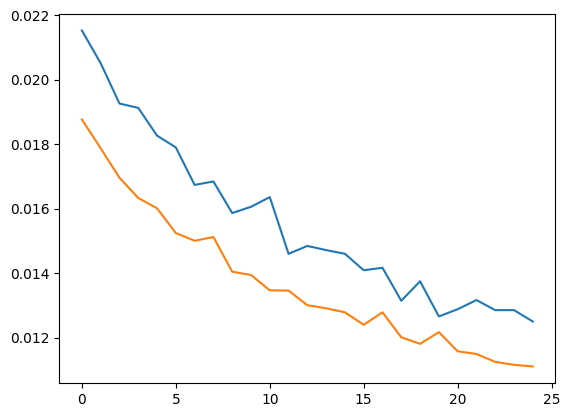

Accuracy: 96.23893805309734% (435/452)


In [7]:
import os
import glob
import cv2
import torch
import torchvision
from torchvision import models
import torch.nn.functional as f
#from torchvision.transforms import functional as TF
import matplotlib.pyplot as plt
#from create_dataset import img2tensor
#from learning import cnn_train, cnn_test,output_graph
from google.colab import drive
#from get_image_tensor import image_feature
import torch.nn as nn
from np import *  # import numpy as np

# https://qiita.com/harutine/items/972cc5ff7868d6dec27b#3-pytorch%E3%81%A7%E3%81%AEcnn%E5%AE%9F%E8%A3%85

drive.mount('/content/drive')


# 計算環境が、CUDA(GPU)か、CPUか
device = 'cuda' if torch.cuda.is_available() else 'cpu'
print('device: ' + device)

# 学習・テスト結果の保存用辞書
history_train = {
    'train_loss': [],   # 損失関数の値
    'train_acc': [],    # 正解率
}

history_test = {
    'test_loss': [],    # 損失関数の値
    'test_acc': [],     # 正解率
}
img_w=128
img_h=128
# ネットワークを構築（ : torch.nn.Module は型アノテーション）
# 変数modelに構築するMymodel()は「ネットワークの実装」で定義します


use_pretrained = True

# モデルをロード
model = models.vgg16(pretrained=use_pretrained)

print(model)
print('変更前 : ', model.classifier[6])
model.classifier[6] = nn.Linear(in_features=4096, out_features=2)
print('変更後 : ', model.classifier[6])
list(model.classifier[6].named_parameters())
for name, param in model.named_parameters():
    print('name : ', name)
params_to_update = []

# 学習させるパラメータ名
update_param_names = ['classifier.6.weight', 'classifier.6.bias']

# 学習させるパラメータ以外は勾配計算をなくし、変化しないように設定

for name, param in model.named_parameters():

    if name in update_param_names:
        param.requires_grad = True
        params_to_update.append(param)
        print('name : ', name)
    else:
        param.requires_grad = False

# params_to_updateの中身を確認
print('--------------------')
print(params_to_update)



#model : torch.nn.Module = Mymodel(img_w,img_h)
#model = model.to(device) # GPUあるいはCPUに合わせて再構成

path = '/content/drive/My Drive/catdog/img/'
#catdog_dir = 'C:/Users/uhoku/Dropbox/Python/CNN/catdog/img/'


no_of_augment =2
dataset = image_feature(path,device,no_of_augment,img_w,img_h)



# 画像データ・正解ラベルのペアをデータにセットする
#TensorDatasetはtensor をデータセット型に変換するメソッド。1上記のimage_featureでは、これに代えてclass image_feature(Dataset):でカスタマイズしたdataset作成メソッドを使う
# このようにカスタマイズしたデータセットを使いたい場合は、TensorDatasetのかわりにDatasetメソッドを継承して使う
#dataset = torch.utils.data.TensorDataset(data_tensor, label_tensor)

train_data_size = int(len(dataset) * 0.8)
test_data_size = len(dataset)-train_data_size
train_data, val_data = torch.utils.data.random_split(dataset, [train_data_size, test_data_size])
train_length=len(train_data)
val_length = len(val_data)

# セットしたデータをバッチサイズごとの配列に入れる。
train_loader = torch.utils.data.DataLoader(train_data, batch_size=10, shuffle=True)
val_loader = torch.utils.data.DataLoader(val_data, batch_size=10, shuffle=True)

#ファインチューニング
#optimizer=torch.optim.Adagrad(model.parameters(), lr=0.0001, lr_decay=0, weight_decay=0, initial_accumulator_value=0, eps=1e-10)
#
#転移学習
optimizer=torch.optim.Adagrad(params_to_update, lr=0.0001, lr_decay=0, weight_decay=0, initial_accumulator_value=0, eps=1e-10)


scheduler = torch.optim.lr_scheduler.MultiStepLR(optimizer, milestones=[100,500], gamma=0.5)
criterion = nn.CrossEntropyLoss()
history = {"train_loss": [], "val_loss": [], "labels":[],"train_loss_byBatch":[]}
num_epochs=30
Y_train = []
pred_train =[]
min_loss=10000000000
predicts=[]
trues = []
n_epoch=0
for epoch in range(num_epochs):
  model.train()# nn.moduleを継承したクラスからオブジェクトを生成した場合、訓練と予測はコードをそれぞれ記述
             # する必要はなく　train(), eval()　で自動的にに切り替わる

  train_loss_acc=0
  for i, (x, labels) in enumerate(train_loader):

    #x=torch.t(x)
    output = model(x)
    # 分類問題の場合output は、行方向がバッチサイズ、列方向がクラス数であるような2次元配列
    # これに対して、labelsは、バッチサイズ分の1次元配列。分類問題でのニューラルネットワークの
    # 教師ラベルレイヤは、one hot なので、本来はoutputと同じクラス数分の次元数をもつはずだか
    # これは、nn.CrossEntropyLoss()のなかで自動的にデータ形式の変換をやっている模様
    # また、criterion での損失計算結果 loss は、バッチサイズ分足し合わせたスカラーになる。
    loss = criterion(output, labels)
    history["train_loss_byBatch"].append(loss)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    train_loss_acc+=loss
    if num_epochs-1 == epoch:
      Y_train+=labels.view(1,-1).to('cpu').detach().numpy().copy().tolist()
      pred_train+=output.view(1,-1).to('cpu').detach().numpy().copy().tolist()

  train_loss=train_loss_acc/train_length

  #if 損失が閾値以上ならepochをリセット
  print(f'Epoch: {epoch+1}, loss: {train_loss: 0.4f}')
  history["train_loss"].append(train_loss)

  if train_loss<min_loss:
        min_loss=train_loss
        torch.save(model, 'best_model.pth')


  scheduler.step()

  correct = 0
  model.eval()

  val_loss_acc=0
  with torch.no_grad():
    for i, (x, labels) in enumerate(val_loader):

      output = model(x)
      loss = criterion(output,labels)
      val_loss_acc+=loss

      if num_epochs-1 == epoch:
        pred = output.argmax(1)
        predicts+=pred.detach().numpy().copy().tolist()
        trues+=labels.detach().numpy().copy().tolist()
        # 正解数をカウント
        correct += pred.eq(labels.view_as(pred)).sum().item()
  val_loss = val_loss_acc/val_length
  print(f'Epoch: {epoch+1}, val_loss: {val_loss : 0.4f}')
  history["val_loss"].append(val_loss)
  '''
  if n_epoch >10:
      break
  else:
    if val_loss < train_loss :
      n_epoch +=1
    else:
      n_epoch =0
  '''

train_loss_tensor = torch.stack(history["train_loss"])
train_loss_np = train_loss_tensor.detach().numpy().copy()
val_loss_tensor = torch.stack(history["val_loss"])
val_loss_np = val_loss_tensor.detach().numpy().copy()
plt.plot(train_loss_np[5:])
plt.plot(val_loss_np[5:])
plt.show()


'''
train_loss_batch = torch.stack(history["train_loss_byBatch"])
train_loss_batchnp = train_loss_batch.detach().numpy().copy()

plt.plot(train_loss_batchnp)
plt.show()
'''



print(f"Accuracy: {100*correct/len(val_data)}% ({correct}/{len(val_data)})")

